# Representing data
The task of this notebook is to start analysing the data thats been gathered and cleaned to understand what type of information we have at hand. This will be done through a few ways of representing the data from the corpus and document term matrix.

### Imports 
* pandas - how we are storing the data
* matplotlib - how we are going to represent the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 6}

plt.rc('font', **font)

In [4]:
data = pd.read_pickle("twitterBias/notebooks/pickle/dtm.pkl")
corpus = pd.read_pickle("twitterBias/notebooks/pickle/corpus.p")

In [5]:
total = {
    "word": list(),
    "count": list()
}
for c in data.columns:
    sumation = sum(data[c])
    total["word"].append(c)
    total["count"].append(sumation)
    

<BarContainer object of 25 artists>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


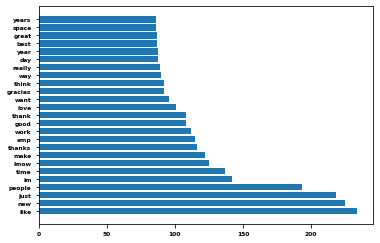

In [6]:
totDF = pd.DataFrame(total)
totDF= totDF.sort_values("count", ascending=False)
plt.barh(totDF["word"][:25] , totDF["count"][:25])


# Most used words
From the top 25 words used by all the accounts doesn't look very interesting, all the words seem to be either very nuteral and words youd expect to be the most common in the English language. This hopefully proves that the data gathered would be whats expected, mainly there are not anomalies. The only one that could be seen as a bit off would be 'gracias' being that it's another language. Not all the accounts would have been English speakers however so this is also understandable.

<BarContainer object of 40 artists>

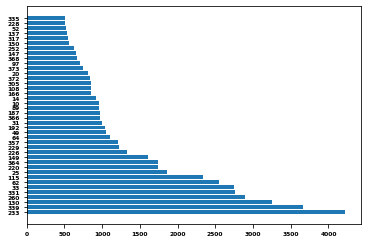

In [7]:
# Counting words per user

totWordCount = {
    "index": list(),
    "count": list()
}

for index, row in corpus.iterrows():
    word_count = len(row[0].split())
    # don't add accounts with only one word
    if (word_count != 1):
        totWordCount["index"].append(str(index))
        totWordCount["count"].append(word_count)

totWC = pd.DataFrame(totWordCount)
totWC= totWC.sort_values("count", ascending=False)
plt.barh(totWC["index"][:40] , totWC["count"][:40])

# Word count per user
Looking at this graph it is very clear to see that very few accounts will have a lot of influence on any of the information gathered from this data as they will have more words. This could present a problem due to the fact the goal was to find a representation from many accounts from twitter. However, it may not be too bad as there are still many account above 750 words each.

Another thought is that the accounts with less words for all thier tweets are more likely to be bot accounts on twitter which could make some of the information useless, so getting rid of all the accounts under 500 may help stop this from happening.

<BarContainer object of 25 artists>

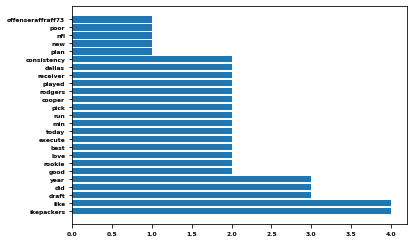

In [65]:
# Need to turn the top 5 accounts into thier own document term matrix
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

data_cv = cv.fit_transform(corpus.tweets[:5])
CW_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
CW_dtm.index = corpus[:5].index

CW_dtm.columns
user1 = {
    "word": list(),
    "count": list()
}
for c in CW_dtm.columns:
    sumation = CW_dtm[c][0]
    user1["word"].append(c)
    user1["count"].append(sumation)

totDF = pd.DataFrame(user1)
totDF= totDF.sort_values("count", ascending=False)
plt.barh(totDF["word"][:25] , totDF["count"][:25])